In [112]:
import evaluate
import yaml

chronos_model_id  = "amazon/chronos-t5-small"
device = "cuda:0"
torch_dtype = "bfloat16"
batch_size = 32
num_samples = 20

pipeline = evaluate.ChronosPipeline.from_pretrained(
    chronos_model_id,
    device_map=device,
    torch_dtype=torch_dtype,
)

# Load backtest configs
with open("/home/ubuntu/.jupyter/chronos-forecasting/scripts/evaluation/configs/bike-zero-shot.yaml") as fp:
    backtest_configs = yaml.safe_load(fp)
config = backtest_configs[0]


test_data = evaluate.load_and_split_dataset(backtest_config=config)

sample_forecasts = evaluate.generate_sample_forecasts(
    test_data.input,
    pipeline=pipeline,
    prediction_length=config["prediction_length"],
    batch_size=batch_size,
    num_samples=num_samples,
    temperature=None,
    top_k=None,
    top_p=None,
)

1it [00:00, 15.53it/s]


In [69]:
from gluonts.itertools import batcher
context = []
for batch in batcher(test_data.input, batch_size=32):
     context.append([(entry["target"]) for entry in batch])
print(context)

[[array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,   54,  222,  251,  117,    9,   78,   83,   75,   93,
        150,   86,  186,   34,   15,   38,  123,  140,   42,   47,   72,
         61,   88,  100,  354,  120,   64,   53,   47,  149,  288,  397,
        208,  140,  218,  259,  579,  532,  639,  195,   74,  139,  100,
        120,  424,  694,   81,  137,  231,  123,  214,  640,  114,  244,
        316,  191,   46,  247,  724,  982,  359,  289,  321,  424,  884,
       1424, 1047,  401,  460,  203,  166,  300,  981,  472,  222,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  694,  550,  695,
        692,  902, 1582,  773,  678,  536,  735,  909, 2258, 1576,  836,
        659,  740,  758,  871, 2001, 2355, 1549, 

{'start': Period('2012-11-02', 'D'), 'target': array([5229, 4109, 3906, 4881, 5220, 4709, 4975])}


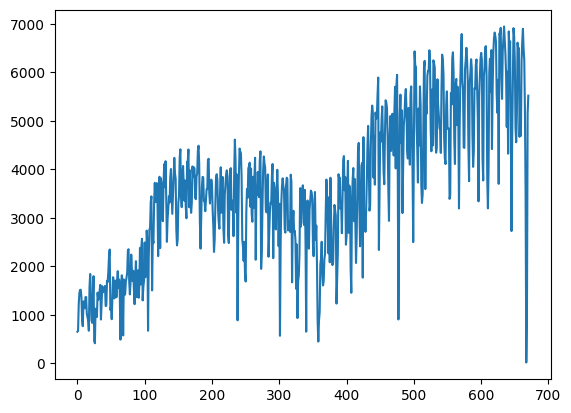

In [114]:
a = [item for item in test_data]
plt.plot(a[1][0]['target'])
print(a[1][1])

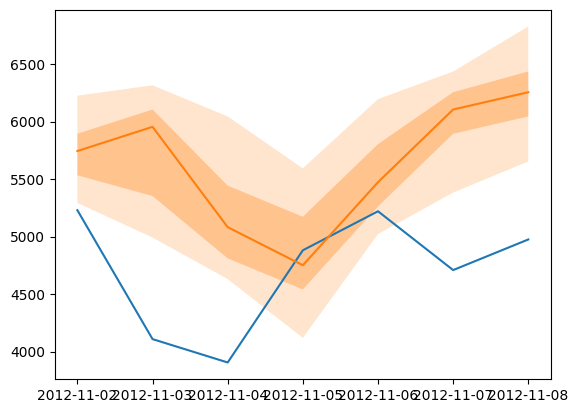

In [115]:
import matplotlib.dates as mdates
import pandas as pd
dates = pd.date_range(start=a[1][1]['start'].to_timestamp(), periods=len(a[1][1]['target']), freq='D')
# days = mdates.drange(a[1][1]['start'],then,dt.timedelta(days=1))
plt.plot(dates, a[1][1]['target'])
sample_forecasts[1].plot()
